In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [40]:
templates = pd.read_csv('templates.csv')

In [41]:
df = templates[~templates['source'].str.contains('metadata')].reset_index(drop=True)
df

,source,mode,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,bayes,major,0.199654,0.008991,0.129942,0.012428,0.126389,0.085451,0.026373,0.206559,0.013393,0.088256,0.014587,0.087976
1,bayes,minor,0.179302,0.017074,0.108227,0.119535,0.025539,0.111840,0.020188,0.181799,0.072189,0.034139,0.082571,0.047595
2,krumhansl,major,0.151950,0.053362,0.083274,0.055755,0.104810,0.097870,0.060302,0.124192,0.057191,0.087581,0.054798,0.068916
3,krumhansl,minor,0.142215,0.060211,0.079083,0.120872,0.058414,0.079308,0.057066,0.106718,0.089418,0.060436,0.075039,0.071220
4,temperley,major,0.129870,0.051948,0.090909,0.051948,0.116883,0.103896,0.051948,0.116883,0.051948,0.090909,0.038961,0.103896
5,temperley,minor,0.129870,0.051948,0.090909,0.116883,0.051948,0.103896,0.051948,0.116883,0.090909,0.051948,0.038961,0.103896
6,albrecht,major,0.238000,0.006000,0.111000,0.006000,0.137000,0.094000,0.016000,0.214000,0.009000,0.080000,0.008000,0.081000
7,albrecht,minor,0.220441,0.006012,0.104208,0.123246,0.019038,0.103206,0.012024,0.214429,0.062124,0.022044,0.061122,0.052104


In [42]:
src = ['Harasim et al. (2019)'] * 2 + ['Krumhansl & Kessler (1982)'] * 2 + ['Temperley (2001)'] * 2 + ['Albrecht & Shanahan (2013)'] * 2 
df['source'] = src

In [43]:
# reorder columns
df = df.append(df.iloc[:2,:]).reset_index(drop=True)
df = df.drop(df.index[0:2]).reset_index(drop=True)

In [44]:
df

,source,mode,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,Krumhansl & Kessler (1982),major,0.151950,0.053362,0.083274,0.055755,0.104810,0.097870,0.060302,0.124192,0.057191,0.087581,0.054798,0.068916
1,Krumhansl & Kessler (1982),minor,0.142215,0.060211,0.079083,0.120872,0.058414,0.079308,0.057066,0.106718,0.089418,0.060436,0.075039,0.071220
2,Temperley (2001),major,0.129870,0.051948,0.090909,0.051948,0.116883,0.103896,0.051948,0.116883,0.051948,0.090909,0.038961,0.103896
3,Temperley (2001),minor,0.129870,0.051948,0.090909,0.116883,0.051948,0.103896,0.051948,0.116883,0.090909,0.051948,0.038961,0.103896
4,Albrecht & Shanahan (2013),major,0.238000,0.006000,0.111000,0.006000,0.137000,0.094000,0.016000,0.214000,0.009000,0.080000,0.008000,0.081000
5,Albrecht & Shanahan (2013),minor,0.220441,0.006012,0.104208,0.123246,0.019038,0.103206,0.012024,0.214429,0.062124,0.022044,0.061122,0.052104
6,Harasim et al. (2019),major,0.199654,0.008991,0.129942,0.012428,0.126389,0.085451,0.026373,0.206559,0.013393,0.088256,0.014587,0.087976
7,Harasim et al. (2019),minor,0.179302,0.017074,0.108227,0.119535,0.025539,0.111840,0.020188,0.181799,0.072189,0.034139,0.082571,0.047595


In [45]:
major = df[df['mode'] == 'major']
minor = df[df['mode'] == 'minor']

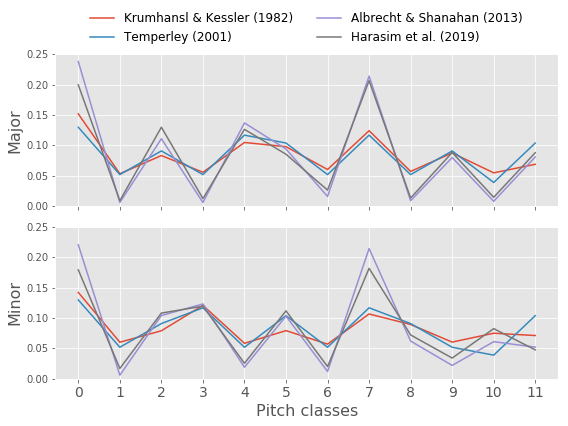

In [46]:
fig, axes = plt.subplots(2,1, figsize=(8,6), sharex=True)

for i, (df, label) in enumerate(zip([major, minor], ['Major', 'Minor'])):
    for j, row in df.iterrows():
        source = row['source']
        vals = [row['pc'+str(k)] for k in range(12)]
        axes[i].plot(vals, label=source)
        axes[i].set_ylim(0,0.25)
        axes[i].set_ylabel(label, fontsize=16)
        
    
axes[0].legend(
    ncol=2, 
    loc=0, 
    bbox_to_anchor=(.95, 1.35), 
    fontsize=12, 
    frameon=False
)
axes[1].set_xlabel('Pitch classes', fontsize=16)
plt.xticks(np.arange(12), np.arange(12), fontsize=14)

plt.tight_layout()
plt.savefig('../img/templates.png', dpi=300)
plt.show()

In [55]:
def plot_radar(i, ax):
    
    # initialize radar plot
    ax.set_theta_offset(pi / 2) # Put first axis on top
    ax.set_theta_direction(-1) # clockwise

    # Draw angles for pitch classes
    ax.set_xticks(angles)

    # set position in degrees (360°) and labels for values
    ax.set_rlabel_position(0)
    # rlabels = np.linspace(0,0.25, 6, endpoint=True)
    rlabels = [0.00, 0.05, 0.10, 0.15, 0.2, 0.25]
    ax.set_rticks([l for l in rlabels])
    ax.set_rlabel_position(180)
    ax.set_yticklabels(rlabels, fontdict={'fontsize':13, 'color':'#555555'})

    # cut off y-axis
    ax.set_ylim(0, .25) 

    # format title
    ax.title.set_fontsize(title_size)
    ax.title.set_position([.5, 1.1])
    
    for m in range(2):
        values = templates.iloc[2*i+m][["pc" + str(k) for k in fifhts_order]]
        values = np.append(values, values[0])
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=modes[m], alpha=line_alpha, color=colors[m])
        ax.fill(angles, values, color=colors[m], alpha=area_alpha)
        ax.set_xticklabels(fifhts_order, fontdict={'fontsize':label_size})
    return ax

In [56]:
# templates = templates[templates.source == 'Harasim et al. (2019)']

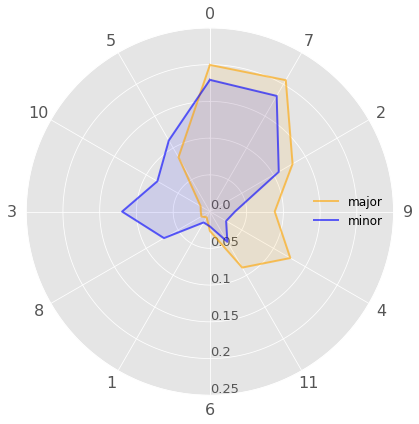

In [75]:
from math import pi

fifhts_order = [k*7 % 12 for k in range(12)]
title_size = 18
label_size = 16
area_alpha = 0.1
line_alpha = 0.6

# angle of each axis
angles = [n / float(12) * 2 * pi for n in range(12)]
# add first angle in order to close the circle
angles += angles[:1] 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), subplot_kw={'polar':True})

fig.set_figheight(6)
fig.set_figwidth(8)
fig.subplots_adjust(wspace=1)

# set column titles
# cols = ['{}'.format(col) for col in templates['source'].unique()]
# cols = ['Bayesian\nModel']
# for ax, col in zip(axes, cols):
#     ax.set_title(col)

modes  = ["major", "minor"]
colors = ['orange', 'blue']

# for i, ax in enumerate(axes):
plot_radar(1, ax)

ax.legend(loc=5, frameon=False, fontsize=12)

fig.tight_layout()

# plt.savefig("radars.eps", format="eps", dpi=600, bbox_inches="tight")
plt.savefig("../img/radars.png", format="png", dpi=300, bbox_inches="tight")

plt.show()

In [76]:
def plot_lof(piece):
    
    df = pd.read_csv(piece, index_col=0)
    
    return df.head()

In [77]:
from pitchplots.static import tonnetz

In [136]:
cmap= 'Reds'
nan_color = 'w'
cbar=False
titlesize = 44
figsize=(15,15)

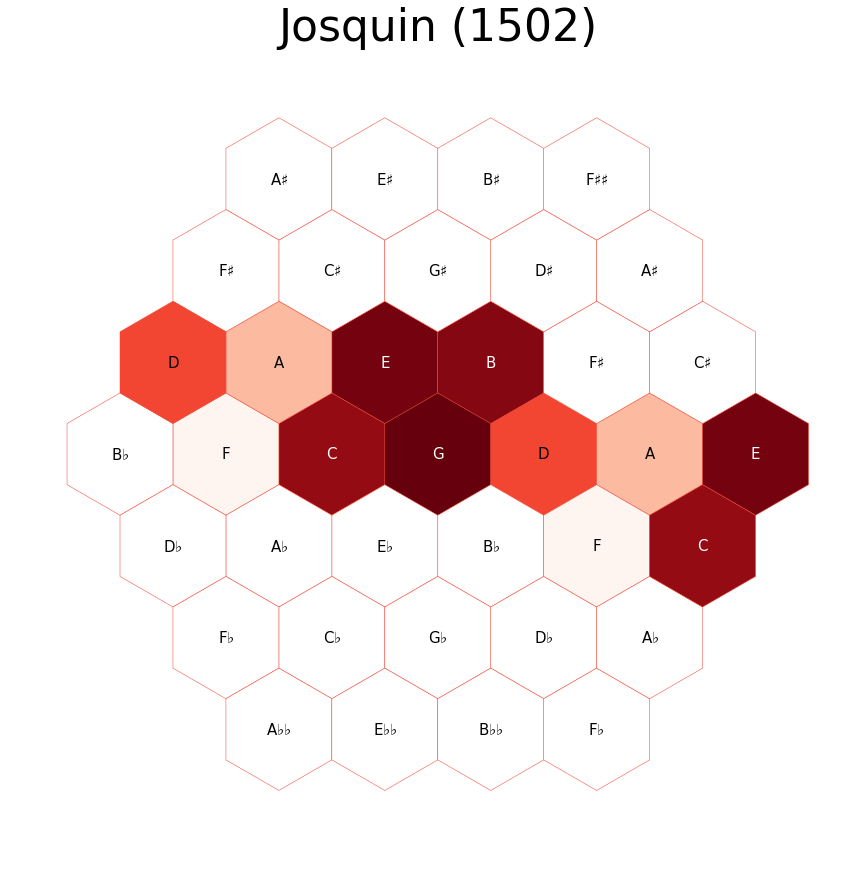

In [137]:
josquin = tonnetz('../../../DCMLab/ExtendedTonality/data/DataFrames/Josquin Missa Gaudeamus - Agnus II.xml.csv', cmap=cmap, nan_color=nan_color,colorbar=cbar, figsize=figsize)
plt.title('Josquin (1502)', fontsize=titlesize)
plt.savefig('../img/josquin_tonnetz.png', dpi=300)

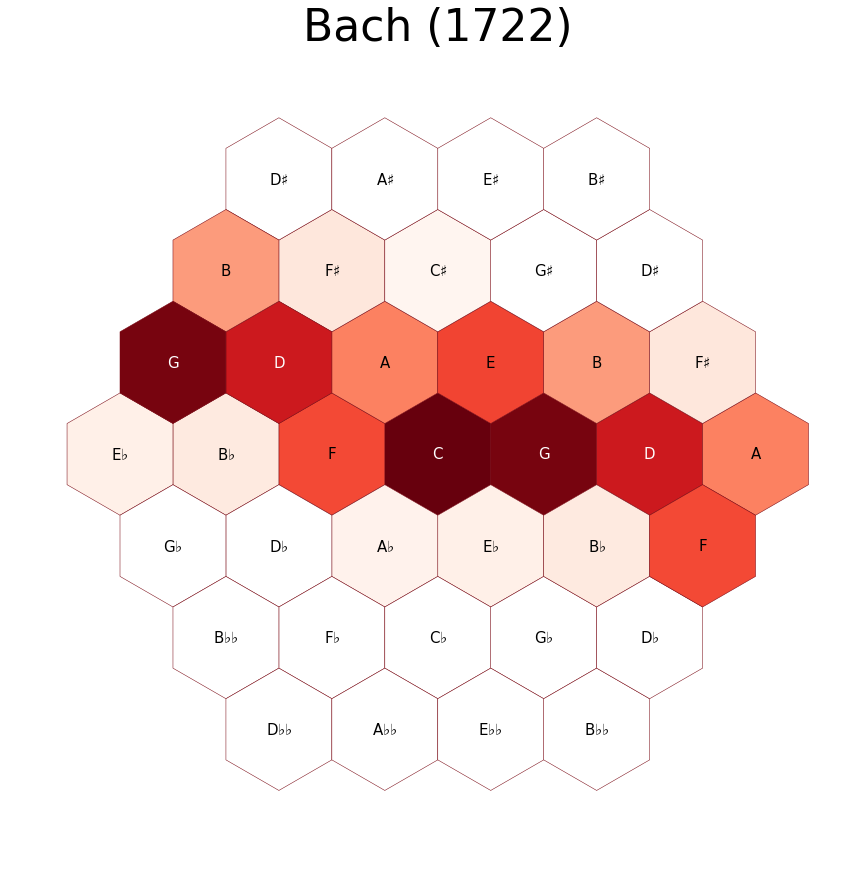

In [138]:
bach = tonnetz('../../../DCMLab/ExtendedTonality/data/DataFrames/210606-Prelude_No._1_BWV_846_in_C_Major.mxl.csv', cmap=cmap, nan_color=nan_color, colorbar=cbar, figsize=figsize)
plt.title('Bach (1722)', fontsize=titlesize)
plt.savefig('../img/bach_tonnetz.png', dpi=300)

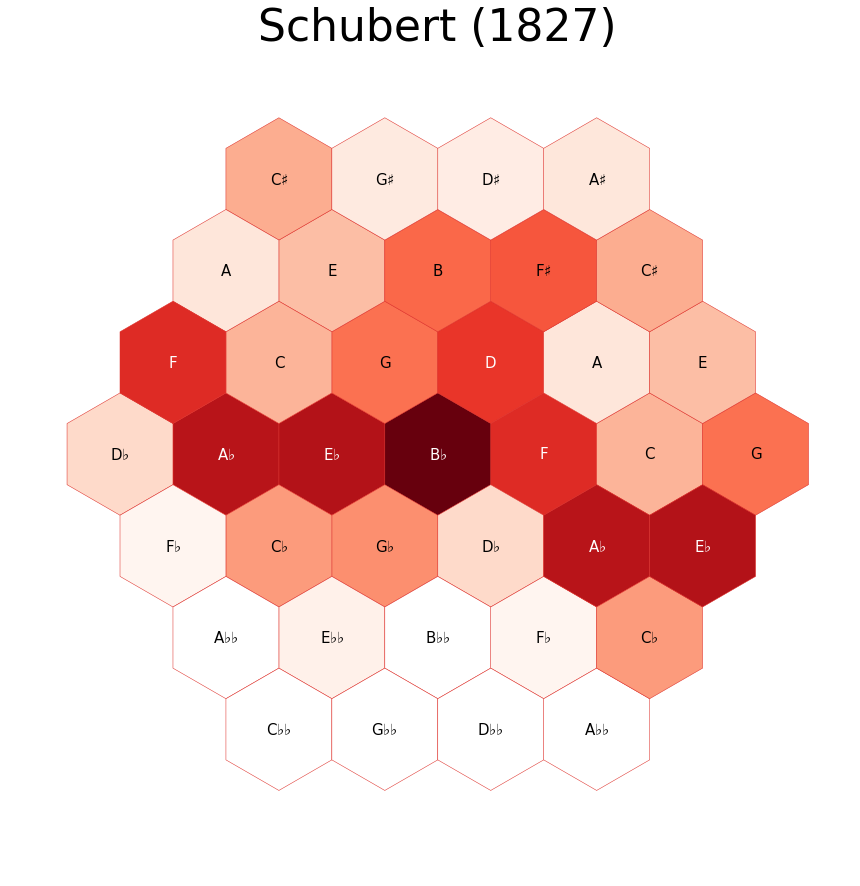

In [139]:
schubert = tonnetz('../../../DCMLab/ExtendedTonality/data/DataFrames/Schubert_90_2.0_0.0.xml.csv', cmap=cmap, nan_color=nan_color, colorbar=cbar, figsize=figsize)
plt.title('Schubert (1827)', fontsize=titlesize)
plt.savefig('../img/schubert_tonnetz.png', dpi=300)